#  Predicting Student Exam Scores Using Machine Learning

##  Problem Statement

Academic success in Spain’s *Título de Bachiller* system is influenced by various factors such as study habits, parental background, attendance, and support systems. In this project, we aim to build a machine learning model that can predict a student's final **Exam Score**, helping identify students at academic risk for early intervention.

---

##  Objective

To develop regression models that can accurately predict the `Exam_Score` using features such as:
- Hours studied per week
- Attendance
- Tutoring support
- Gender
- Region (Urban/Rural)
- Parent's education level

---

##  Dataset Overview

- **Dataset Name:** SAP-4000
- **Total Records:** 4,000 students
- **Target Variable:** `Exam_Score` (10.0 – 100.0)

###  Features:
| Variable          | Type                | Description |
|------------------|---------------------|-------------|
| Gender           | Categorical (Nominal) | Male, Female |
| HoursStudied/Week| Numeric (Continuous) | 0.0 – 16.0 |
| Tutoring         | Categorical (Binary) | Yes, No |
| Region           | Categorical (Nominal) | Urban, Rural |
| Attendance (%)   | Numeric (Continuous) | 50.0 – 100.0 |
| ParentEducation  | Categorical (Ordinal) | None, Primary, Secondary, Tertiary |
| Exam_Score       | Numeric (Target)    | 10.0 – 100.0 |

---

##  Step 1: Data Preprocessing

- Handle missing values (if any).
- Convert categorical data to numerical:
  - **Label Encoding** for `ParentEducation` (ordinal).
  - **One-Hot Encoding** for `Gender`, `Region`, `Tutoring` (nominal).
- Normalize/scale numeric features if needed (optional).

---

##  Step 2: Feature Selection

- **Heatmap:** Visualize correlation between numerical features and `Exam_Score`.
- **SelectKBest:** Use `f_regression` to select top relevant features.

```python
from sklearn.feature_selection import SelectKBest, f_regression


##  Step 3: Model Building

We will train the following regression models to predict `Exam_Score`:

- Linear Regression

- DecisionTreeRegressor

---

### Evaluation Metrics

For each model, evaluate performance using the following metrics:

- **R² Score (Train and Test)** — Measures how well the model explains the variance.
- **Mean Absolute Error (MAE)** — Average absolute difference between predicted and actual values.
- **Root Mean Squared Error (RMSE)** — Penalizes larger errors more.



##  Step 4: Cross-Validation

To evaluate how well our model generalizes to unseen data, we use **K-Fold Cross-Validation**.

### 🔹 What is K-Fold?
- The dataset is split into **k subsets (folds)**.
- The model is trained on k-1 folds and tested on the remaining fold.
- This process is repeated k times, and the results are averaged.

We will use **5-Fold Cross-Validation** and evaluate with the **R² score**.



##  Step 5: Overfitting Check

###  What is Overfitting?

Overfitting happens when a model learns the training data **too well**, including noise and outliers. As a result, it performs **poorly on new/unseen data**.

---

###  How to Detect Overfitting?

We compare the model's performance on the **training set** vs the **test set** using metrics like:

- **R² Score (Train vs Test)**
- **MAE / RMSE (Train vs Test)**

>  If **Train R² is high** and **Test R² is low**, the model is likely overfitting.



##  Step 6: Hyperparameter Tuning


---

###  Techniques

We’ll use:

- **GridSearchCV**: Tries all combinations of provided hyperparameters.


---




##  Step 7: Visualization & Interpretation

Once the final model is trained and tuned, it's important to **visually interpret** its predictions and behavior. This helps build trust in the model and understand what factors influence student performance.

---

###  1.  Actual vs Predicted Plot


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"D:\RRU\Sem 8\Meta Scifor\Test\Test\SAP-4000.csv")
data.head()

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,Male,5.5,No,Urban,72.7,Tertiary,43.5
1,Female,6.8,No,Urban,62.0,Primary,51.7
2,Female,9.7,No,Rural,95.0,Secondary,70.1
3,Male,13.3,Yes,Rural,52.9,NaN,79.5
4,Female,8.9,No,Urban,50.8,NaN,52.2


## Step 1

In [3]:
data.shape

(4000, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             4000 non-null   object 
 1   HoursStudied/Week  4000 non-null   float64
 2   Tutoring           4000 non-null   object 
 3   Region             4000 non-null   object 
 4   Attendance(%)      4000 non-null   float64
 5   Parent Education   3578 non-null   object 
 6   Exam_Score         4000 non-null   float64
dtypes: float64(3), object(4)
memory usage: 218.9+ KB


In [5]:
data.isna().sum()

Gender                 0
HoursStudied/Week      0
Tutoring               0
Region                 0
Attendance(%)          0
Parent Education     422
Exam_Score             0
dtype: int64

In [6]:
data.describe()

,HoursStudied/Week,Attendance(%),Exam_Score
count,4000.000000,4000.000000,4000.000000
mean,9.861025,75.224150,71.107775
std,3.713801,14.496906,16.748950
min,0.000000,50.000000,16.600000
25%,7.400000,62.600000,59.300000
50%,9.900000,75.600000,71.550000
75%,12.600000,87.700000,83.500000
max,16.000000,100.000000,100.000000


In [7]:
data['Parent Education']=data['Parent Education'].fillna(data['Parent Education'].mode()[0])

In [8]:
# Convert categorical data to numerical:
#Label Encoding for ParentEducation (ordinal).
#One-Hot Encoding for Gender, Region, Tutoring (nominal).

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label_enc=LabelEncoder()

In [11]:
df1=label_enc.fit_transform(data['Parent Education'])

In [12]:
data['Parent Education']=df1
data.head()

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,Male,5.5,No,Urban,72.7,2,43.5
1,Female,6.8,No,Urban,62.0,0,51.7
2,Female,9.7,No,Rural,95.0,1,70.1
3,Male,13.3,Yes,Rural,52.9,1,79.5
4,Female,8.9,No,Urban,50.8,1,52.2


In [13]:
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import make_column_transformer

In [14]:
one_he=OneHotEncoder()

In [15]:
df2=make_column_transformer(
    (one_he,['Gender', 'Region', 'Tutoring']),remainder='passthrough')

In [16]:
encoded_data=pd.DataFrame(df2.fit_transform(data))
encoded_data

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,1.0,1.0,0.0,5.5,72.7,2.0,43.5
1,1.0,0.0,0.0,1.0,1.0,0.0,6.8,62.0,0.0,51.7
2,1.0,0.0,1.0,0.0,1.0,0.0,9.7,95.0,1.0,70.1
3,0.0,1.0,1.0,0.0,0.0,1.0,13.3,52.9,1.0,79.5
4,1.0,0.0,0.0,1.0,1.0,0.0,8.9,50.8,1.0,52.2
...,...,...,...,...,...,...,...,...,...,...
3995,0.0,1.0,0.0,1.0,0.0,1.0,11.3,79.5,1.0,93.5
3996,0.0,1.0,0.0,1.0,0.0,1.0,3.7,50.7,2.0,53.8
3997,1.0,0.0,1.0,0.0,1.0,0.0,0.0,72.7,2.0,25.4
3998,0.0,1.0,0.0,1.0,1.0,0.0,4.0,62.2,2.0,40.3


In [17]:
final_data=pd.DataFrame(df2.fit_transform(data),columns=['GenderMale','GenderFemale','Rural_Region','Urban_Region','No_Tutoring','Tutoring','HoursStudied',
                                                           'Attendance_Percentage','ParentEducation','Exam_Score'])
final_data

,GenderMale,GenderFemale,Rural_Region,Urban_Region,No_Tutoring,Tutoring,HoursStudied,Attendance_Percentage,ParentEducation,Exam_Score
0,0.0,1.0,0.0,1.0,1.0,0.0,5.5,72.7,2.0,43.5
1,1.0,0.0,0.0,1.0,1.0,0.0,6.8,62.0,0.0,51.7
2,1.0,0.0,1.0,0.0,1.0,0.0,9.7,95.0,1.0,70.1
3,0.0,1.0,1.0,0.0,0.0,1.0,13.3,52.9,1.0,79.5
4,1.0,0.0,0.0,1.0,1.0,0.0,8.9,50.8,1.0,52.2
...,...,...,...,...,...,...,...,...,...,...
3995,0.0,1.0,0.0,1.0,0.0,1.0,11.3,79.5,1.0,93.5
3996,0.0,1.0,0.0,1.0,0.0,1.0,3.7,50.7,2.0,53.8
3997,1.0,0.0,1.0,0.0,1.0,0.0,0.0,72.7,2.0,25.4
3998,0.0,1.0,0.0,1.0,1.0,0.0,4.0,62.2,2.0,40.3


## Step 2

In [19]:
data_correl=final_data.corr().abs()

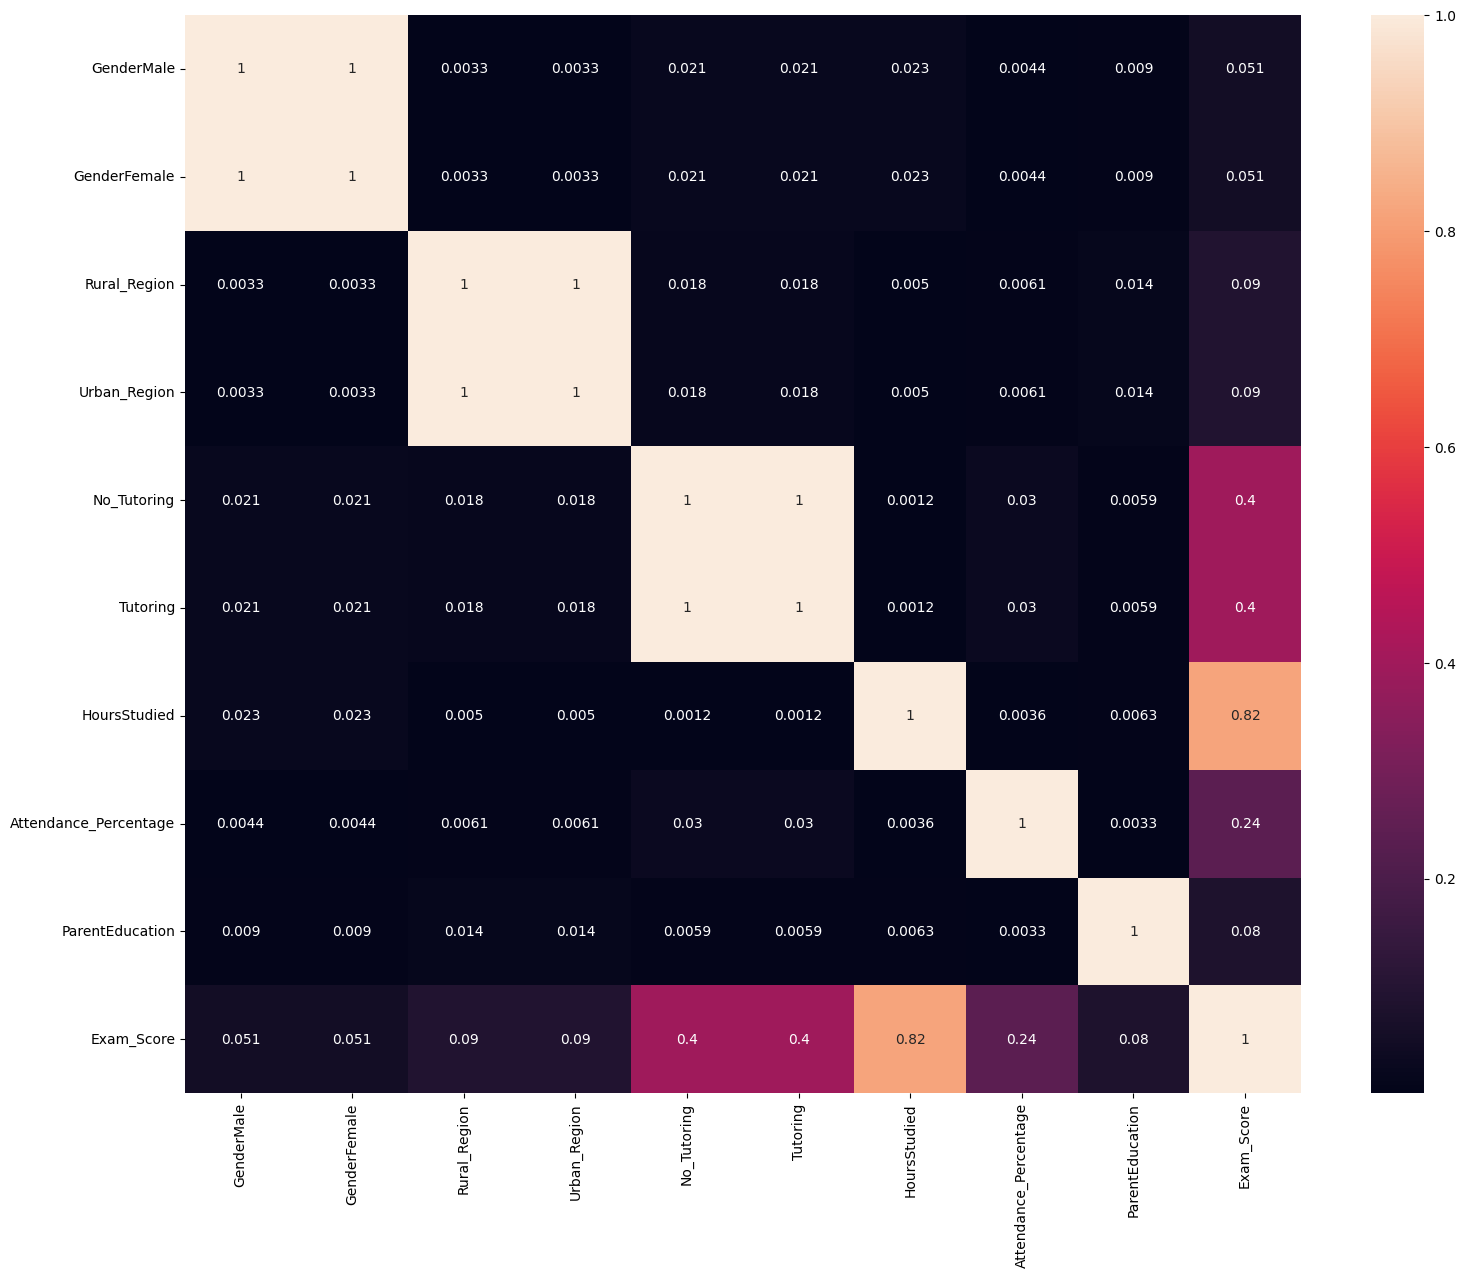

In [20]:
plt.figure(figsize=(18,14))
sns.heatmap(data_correl,annot=True,annot_kws={'size':10})
plt.show()

In [21]:
from sklearn.feature_selection import SelectKBest, f_regression

In [22]:
x = final_data.drop(columns=['Exam_Score'])  # Features
y = final_data['Exam_Score']    

In [23]:
selector = SelectKBest(score_func=f_regression, k=4)  # assigned k =4
x_new = selector.fit_transform(x, y)

In [24]:
selected_f = selector.get_support()
selected_f = x.columns[selected_f]
selected_f

Index(['No_Tutoring', 'Tutoring', 'HoursStudied', 'Attendance_Percentage'], dtype='object')

In [25]:
x = final_data[selected_f]

In [26]:
df_x = final_data.drop(columns=['Exam_Score', 'GenderMale','GenderFemale','Rural_Region','Urban_Region','ParentEducation',])  # Features 

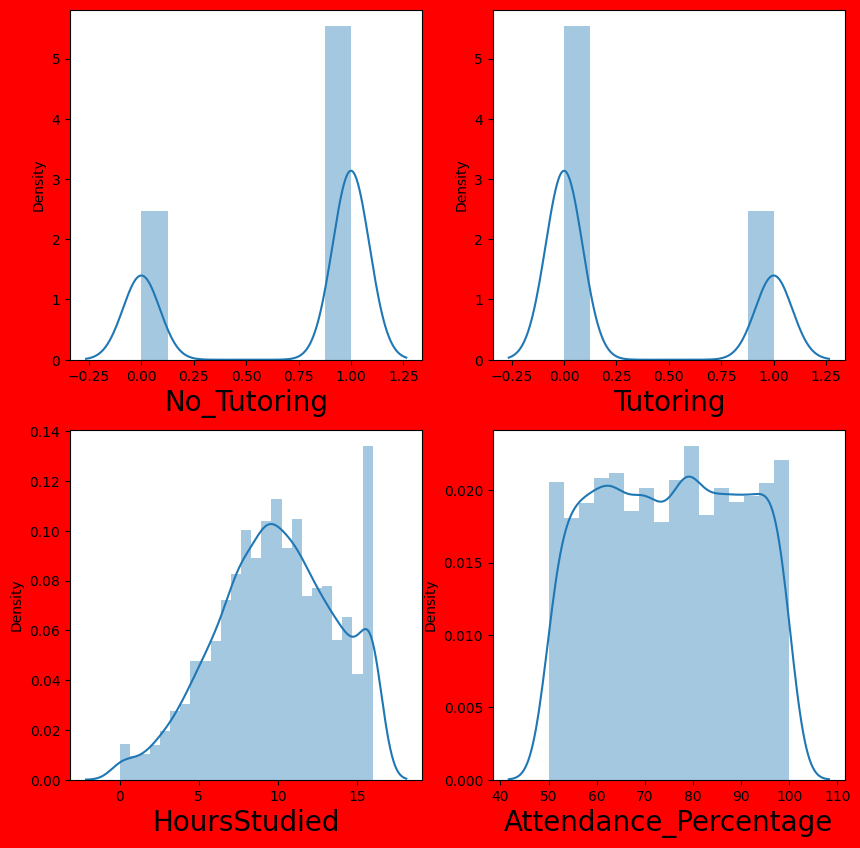

In [27]:
plt.figure(figsize=(10, 10),facecolor='red')
plotnumber=1
for column in df_x:
    if plotnumber<=9:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df_x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

## Step 3

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(x_test)

In [33]:
y_pred

array([ 70.50195312,  60.32519531,  93.0703125 ,  90.6640625 ,
        65.91894531,  64.47460938,  84.41601562,  72.11816406,
        52.68066406,  75.35546875,  57.04492188,  69.96386719,
        73.51464844,  56.74511719,  57.65527344,  73.94433594,
        34.47851562,  74.11621094,  56.02441406,  83.14941406,
        86.80273438, 101.20800781,  80.51757812,  46.82128906,
        71.21582031,  57.82714844,  68.49316406,  84.89257812,
        79.47460938,  69.13769531,  77.09765625,  92.27734375,
        57.07714844,  63.74121094, 100.88964844,  91.40136719,
        88.1796875 ,  72.96679688,  42.15234375,  75.55566406,
        52.41894531,  87.39257812,  60.59863281,  65.10058594,
        70.09277344,  81.73632812,  82.86914062,  60.86523438,
        84.95507812,  69.31054688,  64.90234375,  85.73242188,
        71.95800781,  68.62402344,  54.2109375 ,  50.76660156,
        80.03125   ,  68.19824219,  80.25585938,  76.11328125,
        79.32421875,  68.03613281,  82.93847656,  58.63

In [34]:
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error (MSE):", mean_absolute_error(y_test, y_pred))

R² Score: 0.8997931798766938
Mean Absolute Error (MSE): 4.378552490234375


In [35]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE):",  rmse)

Root Mean Squared Error (RMSE): 5.476763369314897


In [36]:
y_train_pred1 = model.predict(x_train)
y_test_pred1 = model.predict(x_test)

In [37]:
y_train_pred1

array([74.80078125, 56.57421875, 62.25195312, ..., 64.36328125,
       48.01464844, 62.625     ])

In [38]:
r2_train1 = r2_score(y_train, y_train_pred1)
mae_train1 = mean_absolute_error(y_train, y_train_pred1)
rmse_train1 = np.sqrt(mean_squared_error(y_train, y_train_pred1))
print("R² Score of training data:", r2_train1)
print("MAE of training data:", mae_train1)
print("RMSE of training data:", rmse_train1)

R² Score of training data: 0.8863768183111331
MAE of training data: 4.479591430664063
RMSE of training data: 5.597172660626932


In [39]:
r2_test1 = r2_score(y_test, y_test_pred1)
mae_test1 = mean_absolute_error(y_test, y_test_pred1)
rmse_test1 = np.sqrt(mean_squared_error(y_test, y_test_pred1))
print("R² Score of testing data:", r2_test1)
print("MAE of testing data:", mae_test1)
print("RMSE of testing data:", rmse_test1)

R² Score of testing data: 0.8997931798766938
MAE of testing data: 4.378552490234375
RMSE of testing data: 5.476763369314897


## Decisiontree regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
data_model = DecisionTreeRegressor(random_state=42)
data_model.fit(x_train, y_train)


DecisionTreeRegressor(random_state=42)

In [43]:
y_pred2 = data_model.predict(x_test)
y_pred2

array([ 65.1 ,  56.2 , 100.  ,  92.  ,  69.6 ,  70.6 ,  86.  ,  71.2 ,
        50.4 ,  80.4 ,  55.6 ,  76.  ,  79.5 ,  53.5 ,  53.  ,  67.3 ,
        31.7 ,  79.3 ,  52.4 ,  86.7 ,  90.9 ,  99.3 ,  82.4 ,  43.3 ,
        68.9 ,  58.4 ,  72.2 ,  87.8 ,  71.5 ,  57.9 ,  73.4 ,  86.3 ,
        52.4 ,  64.7 , 100.  ,  89.2 ,  85.3 ,  66.6 ,  34.2 ,  77.5 ,
        48.4 ,  80.9 ,  57.3 ,  61.9 ,  66.9 ,  77.3 ,  72.  ,  62.3 ,
        96.1 ,  68.1 ,  67.6 ,  82.4 ,  68.7 ,  74.3 ,  61.9 ,  45.9 ,
        81.8 ,  71.6 ,  74.9 ,  84.6 ,  78.9 ,  73.2 ,  79.  ,  50.3 ,
        59.3 ,  20.  ,  81.  ,  71.3 ,  70.5 , 100.  ,  57.2 ,  76.1 ,
        73.7 ,  86.9 ,  99.6 ,  61.4 ,  91.2 ,  57.3 ,  71.5 , 100.  ,
        99.  ,  82.  ,  79.7 ,  40.2 ,  65.8 ,  62.3 ,  50.9 ,  78.4 ,
        73.6 ,  66.7 ,  62.4 ,  69.2 ,  76.2 ,  40.3 ,  94.8 ,  86.2 ,
        53.7 ,  66.6 ,  57.  , 100.  ,  31.7 ,  84.9 ,  42.1 ,  90.8 ,
        54.2 ,  45.9 ,  73.6 ,  94.  ,  65.4 ,  64.1 ,  80.4 ,  61.8 ,
      

In [44]:
print("r² Score:", r2_score(y_test, y_pred2))
print("Mean Absolute Error (MSE):", mean_absolute_error(y_test, y_pred2))

r² Score: 0.7934015288975357
Mean Absolute Error (MSE): 6.119625000000001


In [45]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred2))
print("Root Mean Squared Error (RMSE):",  rmse)

Root Mean Squared Error (RMSE): 7.863916406600467


In [46]:
y_train_pred2 = data_model.predict(x_train)
y_test_pred2 = data_model.predict(x_test)

In [47]:
r2_train2 = r2_score(y_train, y_train_pred2)
mae_train2 = mean_absolute_error(y_train, y_train_pred2)
rmse_train2 = np.sqrt(mean_squared_error(y_train, y_train_pred2))
print("R² Score of training data:", r2_train2)
print("MAE of training data:", mae_train2)
print("RMSE of training data:", rmse_train2)

R² Score of training data: 0.997806672192006
MAE of training data: 0.1256354166666667
RMSE of training data: 0.7776550622437518


In [48]:
r2_test2 = r2_score(y_test, y_test_pred2)
mae_test2 = mean_absolute_error(y_test, y_test_pred2)
rmse_test2 = np.sqrt(mean_squared_error(y_test, y_test_pred2))
print("R² Score of testing data:", r2_test2)
print("MAE of testing data:", mae_test2)
print("RMSE of testing data:", rmse_test2)

R² Score of testing data: 0.7934015288975357
MAE of testing data: 6.119625000000001
RMSE of testing data: 7.863916406600467


## Step 5

In [50]:
r2_train1

0.8863768183111331

In [51]:
r2_test1 

0.8997931798766938

## model is overfitted

In [53]:
r2_train2

0.997806672192006

In [54]:
r2_test2

0.7934015288975357

## Decisiontree model not overfitted

## Step 6

In [57]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [58]:
lasso = Lasso(max_iter=100)

In [59]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

In [60]:
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=7, scoring='r2')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=Lasso(max_iter=100),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='r2')

In [61]:
tuned_model = grid_search.best_estimator_

In [62]:
y_train_tuned = tuned_model.predict(x_train)
y_test_tuned = tuned_model.predict(x_test)

In [63]:
r2_train_tuned = r2_score(y_train, y_train_tuned)
print("R² Score of training data:", r2_train_tuned)

R² Score of training data: 0.8863803832949035


In [64]:
r2_test_tuned = r2_score(y_test, y_test_tuned)
print("R² Score of testing data:", r2_test_tuned)

R² Score of testing data: 0.8997309440622323


## Step 7

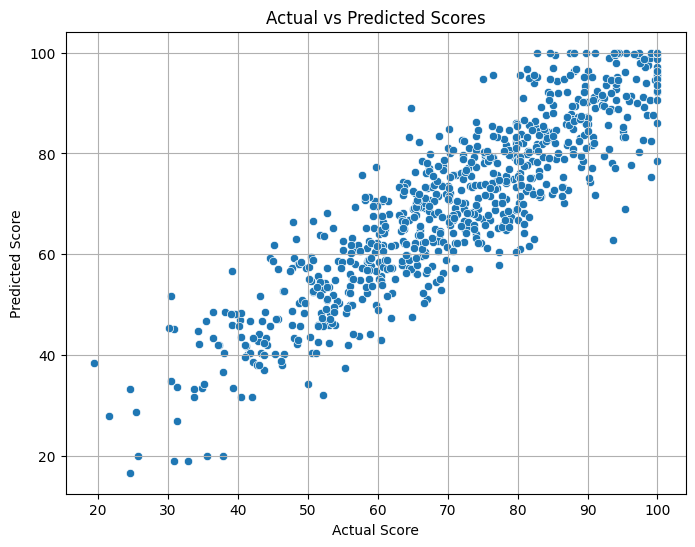

In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred2)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Scores")
plt.grid(True)
plt.show()